# Recurrent Neural Network
## Single Layer

In [1]:
# Libreries
import numpy as np
import matplotlib.pyplot as plt
# Latex font
from matplotlib import rc
#It is no longer neccessary to resize the shapes of the matrices
#Create the activation function for its use with different number of neurons
#There is a parameter c that modify the use of the Sigmoid functions

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

##### The nonlinear system to be identified is given by

$x(k) = f(x(k),u(k),k)$

$x(k) \in \mathbb{R}^{n}; u(k) \in \mathbb{R}^{q} ; q \leq n$

The discrete time step is given by $k$

##### We assume the following parallel structure for neural networks

$\hat{x}(k) = A\hat{x}(k) + \check{W}_1(k)\sigma(\hat{x}(k)) + \check{W}_2(k)\varphi(\hat{x}(k))u_(k)$

where:

$\hat{x}(k) \in \mathbb{R}^{n}$ is the state of the neural network 

$u(k) \in \mathbb{R}^{q}$ is an input measurable action

$2\check{W}_{1}(k) = W_{1}(k) + W_{1}(k+1) \in \mathbb{R}^{n\times k}$ is the matrix for non linear state feedback

$2\check{W}_{2}(k) = W_{2}(k) + W_{2}(k+1) \in \mathbb{R}^{n\times r}$ is the input matrix

$A \in \mathbb{R}^{n \times n } $ is a Hurwitz Matrix in discrete time, which means that is inside the unitari circle

#### Activation Functions

$\sigma_i = a_i(1 + e^{-b_i x_t})^{-1}$

$\varphi_{i,j} = a_{i,j}(1 + e^{-b_{i,j} x_t})^{-1}$

However, any function that satisfies the sector condition is allowed

In [2]:
#First we need to define the activation functions

# The activation functions will convert from a vector field to antoher in the RNN
# The activation functions are the same for DNN and RNN

def functionSigma(x,out,c):
    s = np.zeros((out,1))
    nin = np.shape(x)[0]
    
    for neuronsOut in range(out):
        z = 0
        for neuronsIn in range(nin):
            z += x[neuronsIn]*c[neuronsIn,neuronsOut]
        s[neuronsOut,0] = ((1/(1 + np.exp(z))))
    return s

def functionPhi(x,out,uSize,c):
    s = np.zeros((out,1))#Variable para guardar resultados
    nin = np.shape(x)[0]
    
    for neuronsOut in range(out):
        z = 0
        for neuronsIn in range(nin):
            z += x[neuronsIn]*c[neuronsIn,neuronsOut]
        s[neuronsOut,0] = ((1/(1 + np.exp(z))))*(neuronsOut+1)
    s = s@np.ones((1,uSize))#Multiplicación por una matriz
    
    return s


X = np.ones((2,1))*1
c = np.random.uniform(-1,1,(2,5))
print(c)
y = functionSigma(X,5,c)
print(y)
print(np.shape(y))
z = functionPhi(X,3,1,c)
print(np.shape(z))
print(z)        


[[-0.33108497 -0.04441017  0.55065091 -0.01816458  0.8435774 ]
 [-0.21971555  0.70211582 -0.95660247  0.76330125  0.64545422]]
[[0.6343213 ]
 [0.34125519]
 [0.60011674]
 [0.32188192]
 [0.18406712]]
(5, 1)
(3, 1)
[[0.6343213 ]
 [0.68251039]
 [1.80035023]]


#### Learning laws

$W_i(k+1) = W_i(k) \left(K_i^{-1}I - \Psi_i(k)\Psi_i^{\top}(k) /4 \right)\left(\Psi_i(k)\Psi_i^{\top}(k) /4 -K_i^{-1}I\right)^{-1} - PA\Delta(k)\Psi_i^{\top}(k)\left(K_i^{-1}I - \Psi_i(k)\Psi_i^{\top}(k) /4\right)^{-1}$

$\Psi_1(k) = \sigma(\hat{x}(k))$

$\Psi_2(k) = \varphi(\hat{x}(k))u(k)$





In [37]:
#So the Learning Laws are given as follow
#############ISSUE:
########MUST SEPARATE THE SIGMA FUNCTION AND THE LEARNING LAWS. MUSNT DEPEND ON THE OTHER. RELEASE ON 1.1
def LAW1(W1_a,delta,k1,P,xh,dT, n,c,A):
    W1 = W1_a@(k1 - functionSigma(xh,n,c)@functionSigma(xh,n,c).T)@np.linalg.inv(functionSigma(xh,n,c)@functionSigma(xh,n,c).T + k1)+P@A@delta@functionSigma(xh,n,c).T@np.linalg.inv(functionSigma(xh,n,c)@functionSigma(xh,n,c).T + k1)
    return W1

def LAW2(W2_a,delta,k2,P,xh,u,dT, n1,n2,c,A):
    W2 = W2_a@(k2 - functionPhi(xh,n1,n2,c)*u@functionPhi(xh,n1,n2,c).T)*u@np.linalg.inv(functionPhi(xh,n1,n2,c)*u@functionPhi(xh,n1,n2,c).T*u + k2)+P@A@delta@functionPhi(xh,n1,n2,c).T@np.linalg.inv(functionPhi(xh,n1,n2,c)*u@functionPhi(xh,n1,n2,c).T*u + k2)*u
    return W2


To prove the behavior of the DNN let us introduce the Van Der Pol oscillator which is an unknown nonlinear system. The state equations that describes the system are the following:

$\dot{x}_1=x_2 \\
\dot{x}_2=-x_1+\varepsilon x_2(1-x_1^2)+w(t)+u$

The simulation will run 100 seconds

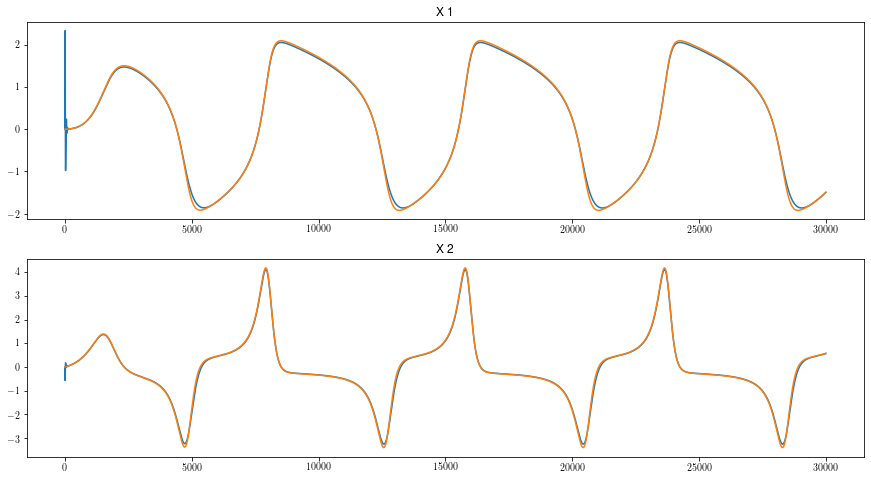

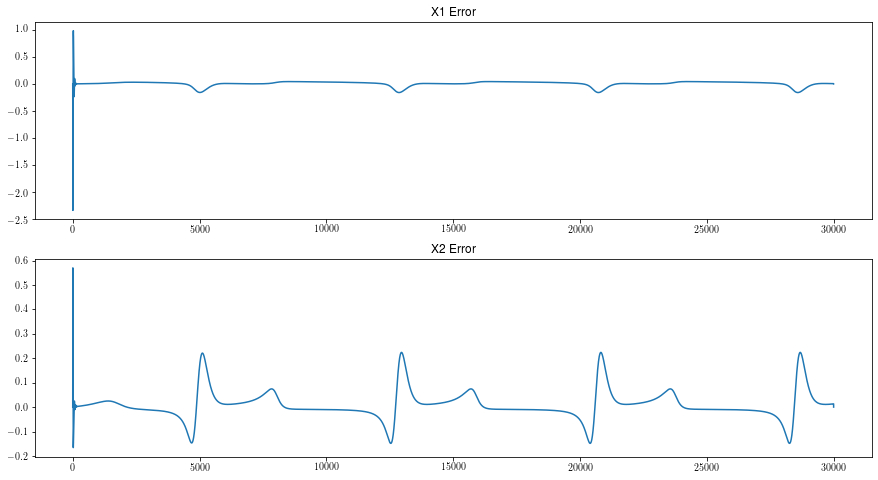

In [41]:
# Simulation Time
#SEGUIR PROBANDO HASTA QUE SALGA LA RED NEURONAL. SE VULVE SINGULAR, REVISAR VALORES
# HAY UN ERROR EN LAS LEYES. HAY QUE REVISARLO.
Tau = 30 #time in seconds
dt = 0.001 # time step
t = int(Tau/dt) # n time steps
# Van der poll simulation parameters
epsilon = 2;#The epsilon parameter
u = 0.3;#External input
stateSize = 2
# Initial conditions
xs = np.zeros((2,t)) #Van Der Poll Oscillator
# Diferential neural network parameters
xh = np.zeros((2,t)) #DNN State
# Matrix A
A = np.array([[1,0.01],
              [0.009,1]])*0.91
# Number of neurons
#This is for a future update of the activation functions
nn1 = 1
nn2 = 1
# Weights 
W1 = np.zeros((2,nn1,t))
# Coefficient c
c1 = np.random.uniform(-1,1,(stateSize,nn1))
W1[:,:,0] = np.random.random((2,nn1))*2-1#For first traning
#W1[:,:,0] = W1[:,:,-1]#To save previus wieghts


W2 = np.zeros((2,nn2,t))
W2[:,:,0] = np.random.random((2,nn2))*2-1#For first training
c2 = np.random.uniform(-1,1,(stateSize,nn2))
#W2[:,:,0] = W2[:,:,-1]
# Identification error
delta = np.zeros((2,t))
#Training
k1 = np.identity(nn1)*100
k2 = np.identity(nn2)*100
P = np.array([[1,0],
              [0,1]])*10

xs = np.zeros((2,1,t))
xh = np.zeros((2,1,t))
Delta = np.zeros((2,1,t))


for i in range(t-1):
    xs[0,0,i+1] = (xs[1,0,i])*dt + xs[0,0,i]
    xs[1,0,i+1] = (-xs[0,0,i] + epsilon*xs[1,0,i]*(1-xs[0,0,i]*xs[0,0,i]) + u)*dt + xs[1,0,i]
    delta = xs[:,:,i]-xh[:,:,i]
    Delta[:,:,i] = delta
    W1[:,:,i+1] = LAW1(W1[:,:,i],delta,k1,P,xh[:,0,i],dt,nn1,c1,A)
    W2[:,:,i+1] = LAW2(W2[:,:,i],delta,k2,P,xh[:,0,i],u,dt,nn2,1,c2,A)
    X = A@xh[:,:,i] + 0.5*(W1[:,:,i+1]+W1[:,:,i])@functionSigma(xh[:,:,i],nn1,c1) + 0.5*(W2[:,:,i+1]+W2[:,:,i])@functionPhi(xh[:,:,i],nn2,1,c2)*u
    xh[:,:,i+1] = X
    ## Loss
# Plotting both states of the Van der pol oscilator
fig = plt.figure(figsize = [15,8]);
plt.subplot(211);
plt.title('X 1')
plt.plot(xh[0,0,:]);
plt.plot(xs[0,0,:]);
plt.subplot(212);
plt.title('X 2')
plt.plot(xh[1,0,:]);
plt.plot(xs[1,0,:]);
plt.savefig('IdentificationRNN.png')
#Plotting Error 
fig = plt.figure(figsize = [15,8]);
plt.subplot(211);
plt.title('X1 Error')
plt.plot(Delta[0,0,:]);
plt.subplot(212);
plt.title('X2 Error')
plt.plot(Delta[1,0,:]);
plt.savefig('IdentificationErrorRNN.png')

/home/guarneros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/home/guarneros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/home/guarneros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in add
/home/guarneros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in square
/home/guarneros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/home/guarneros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':


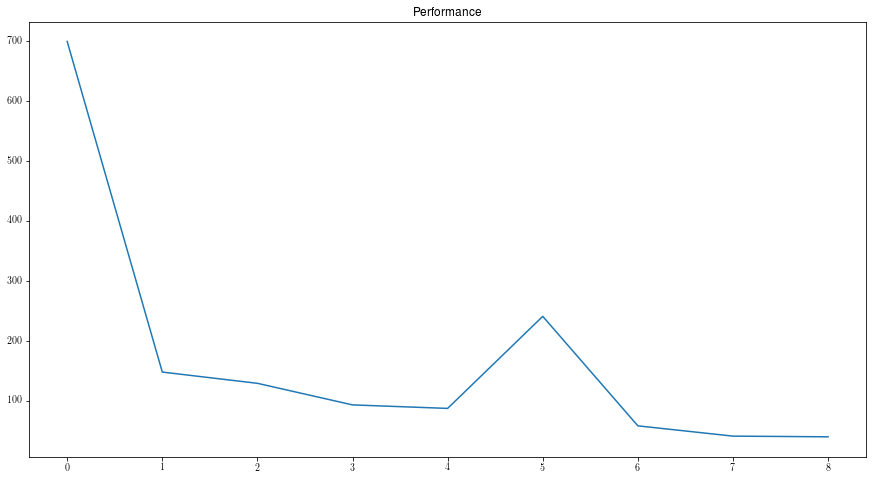

In [46]:
#Measure the identification error

NeuronTests = 10

E = np.zeros((1,NeuronTests))
stateSize = 2
c1 = np.random.uniform(-1,1,(stateSize,1))
c2 = np.random.uniform(-1,1,(stateSize,1))

for k in range(NeuronTests):
    Tau = 30 #time in seconds
    dt = 0.001 # time step
    t = int(Tau/dt) # n time steps
    # Van der poll simulation parameters
    epsilon = 2;#The epsilon parameter
    u = 0.3;#External input
    stateSize = 2
    # Initial conditions
    xs = np.zeros((2,t)) #Van Der Poll Oscillator
    # Diferential neural network parameters
    xh = np.zeros((2,t)) #DNN State
    # Matrix A
    A = np.array([[1,0.01],
                  [0.009,1]])*0.91
    # Number of neurons
    #This is for a future update of the activation functions
    nn1 = k+1
    nn2 = k+1
    # Weights 
    W1 = np.zeros((2,nn1,t))
    # Coefficient c
    W1[:,:,0] = np.random.random((2,nn1))*2-1#For first traning
    #W1[:,:,0] = W1[:,:,-1]#To save previus wieghts
    
    
    W2 = np.zeros((2,nn2,t))
    W2[:,:,0] = np.random.random((2,nn2))*2-1#For first training
    #W2[:,:,0] = W2[:,:,-1]
    # Identification error
    delta = np.zeros((2,t))
    #Training
    k1 = np.identity(nn1)*100
    k2 = np.identity(nn2)*100
    P = np.array([[1,0],
                  [0,1]])*10
    
    xs = np.zeros((2,1,t))
    xh = np.zeros((2,1,t))
    Delta = np.zeros((2,1,t))
    
    
    for i in range(t-1):
        xs[0,0,i+1] = (xs[1,0,i])*dt + xs[0,0,i]
        xs[1,0,i+1] = (-xs[0,0,i] + epsilon*xs[1,0,i]*(1-xs[0,0,i]*xs[0,0,i]) + u)*dt + xs[1,0,i]
        delta = xs[:,:,i]-xh[:,:,i]
        Delta[:,:,i] = delta
        E[0,k] += delta[0]**2 + delta[1]**2
        W1[:,:,i+1] = LAW1(W1[:,:,i],delta,k1,P,xh[:,0,i],dt,nn1,c1,A)
        W2[:,:,i+1] = LAW2(W2[:,:,i],delta,k2,P,xh[:,0,i],u,dt,nn2,1,c2,A)
        X = A@xh[:,:,i] + 0.5*(W1[:,:,i+1]+W1[:,:,i])@functionSigma(xh[:,:,i],nn1,c1) + 0.5*(W2[:,:,i+1]+W2[:,:,i])@functionPhi(xh[:,:,i],nn2,1,c2)*u
        xh[:,:,i+1] = X
    c1 = np.append(c1,np.random.uniform(-1,1,(stateSize,1)),axis=1)
    c2 = np.append(c2,np.random.uniform(-1,1,(stateSize,1)),axis=1)
    

fig = plt.figure(figsize = [15,8]);
plt.title('Performance')
plt.plot(E[0,:]);
plt.savefig('Prueba NeuronasRNN.png')

0


(2, 50, 10000)